Import libraries

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import svm, metrics

import xgboost as xgb
from xgboost import XGBClassifier

Functions for preprocessing

In [2]:
# change string data to integer
def encode_features(df):
    print ('\n########## Encoding Features ##########\n')
    features=['person_home_ownership','loan_intent','loan_grade']
    for feature in features:
        le=LabelEncoder()
        print (feature,df[feature].unique())
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    print('\n')
    return df

# fill N/A data with mean number
def fillna(df):
    df['person_emp_length'].fillna(df['person_emp_length'].mean(),inplace=True)
    df['loan_int_rate'].fillna(df['loan_int_rate'].mean(),inplace=True)
    return df

# delete unnecessary data
def drop_features(df):
    df.drop(['cb_person_default_on_file'],axis=1,inplace=True)
    return df

Load data file

In [3]:
# read dataset
df=pd.read_csv(r'cr_loan2.csv')
# split data bet features(X) and target (y)
y_df=df['loan_status'] # 0: normal, 1: default

Check default rate from data

In [4]:
print ('\n########## Loan Status: default rate ##########\n')
print (y_df.value_counts())
default_cnt=y_df[y_df==1].count()
total_cnt=y_df.count()
print('default rate: {0:.2f}%'.format(default_cnt/total_cnt*100))
print ('\n')


########## Loan Status: default rate ##########

0    25473
1     7108
Name: loan_status, dtype: int64
default rate: 21.82%




Preprocess features data

In [5]:
X_df=df.drop('loan_status',axis=1)

X_df=encode_features(X_df)
X_df=fillna(X_df)
X_df=drop_features(X_df)


########## Encoding Features ##########

person_home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade ['D' 'B' 'C' 'A' 'E' 'F' 'G']




Check features names

In [6]:
print ('\n########## Feature Names ##########\n')
print (X_df.columns)
print ('\n')


########## Feature Names ##########

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')




Set random state number

In [22]:
rnd_st=10   # random state number

Split data for both training and test
(put 20% of data to a test set)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_df, test_size=0.2, random_state=rnd_st)

Print test results

In [9]:
print ('\n########## Test Results ##########\n')


########## Test Results ##########



1. Support Vector Machine (SVM) Test

In [10]:
sv_clf=svm.SVC(random_state=rnd_st)
sv_clf.fit(X_train, y_train)
sv_pred=sv_clf.predict(X_test)
print('Support Vector Classification Accuracy Score: {0:.4f}'.format(accuracy_score(y_test, sv_pred)))
print('\n')

Support Vector Classification Accuracy Score: 0.7985




2. DecisionTree Test

In [11]:
max_depths=[3,5,7,9,11]

for depth in max_depths:
    dt_clf=DecisionTreeClassifier(max_depth=depth, random_state=rnd_st) # make an instance of the model
    dt_clf.fit(X_train, y_train) # train the model on the data
    dt_pred=dt_clf.predict(X_test) # predict the data
    print('DecisionTreeClassifier max_depth: {0} Accuracy Score: {1:.4f}'.format(depth,accuracy_score(y_test, dt_pred)))
print('\n')

DecisionTreeClassifier max_depth: 3 Accuracy Score: 0.8785
DecisionTreeClassifier max_depth: 5 Accuracy Score: 0.9170
DecisionTreeClassifier max_depth: 7 Accuracy Score: 0.9303
DecisionTreeClassifier max_depth: 9 Accuracy Score: 0.9346
DecisionTreeClassifier max_depth: 11 Accuracy Score: 0.9319




Pick the best one to check further

In [12]:
dt_clf=DecisionTreeClassifier(max_depth=9, random_state=rnd_st) # make an instance of the model
dt_clf.fit(X_train, y_train) # train the model on the data
dt_pred=dt_clf.predict(X_test) # predict the data
print('Best decisionTreeClassifier Accuracy Score: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('\n')


Best decisionTreeClassifier Accuracy Score: 0.9346




Draw a decision tree

[Text(2452.655813547486, 3586.25, 'loan_percent_income <= 0.305\ngini = 0.339\nsamples = 26064\nvalue = [20416, 5648]\nclass = normal'),
 Text(1436.2124650837989, 3208.75, 'loan_grade <= 2.5\ngini = 0.26\nsamples = 23039\nvalue = [19498, 3541]\nclass = normal'),
 Text(590.5857192737429, 2831.25, 'person_income <= 19996.0\ngini = 0.155\nsamples = 19774\nvalue = [18101, 1673]\nclass = normal'),
 Text(108.24022346368714, 2453.75, 'loan_percent_income <= 0.155\ngini = 0.425\nsamples = 461\nvalue = [141, 320]\nclass = default'),
 Text(86.59217877094972, 2076.25, 'person_income <= 19884.0\ngini = 0.319\nsamples = 176\nvalue = [141, 35]\nclass = normal'),
 Text(64.94413407821229, 1698.75, 'loan_int_rate <= 6.08\ngini = 0.307\nsamples = 174\nvalue = [141, 33]\nclass = normal'),
 Text(43.29608938547486, 1321.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = default'),
 Text(86.59217877094972, 1321.25, 'loan_int_rate <= 13.33\ngini = 0.295\nsamples = 172\nvalue = [141, 31]\nclass = normal'),

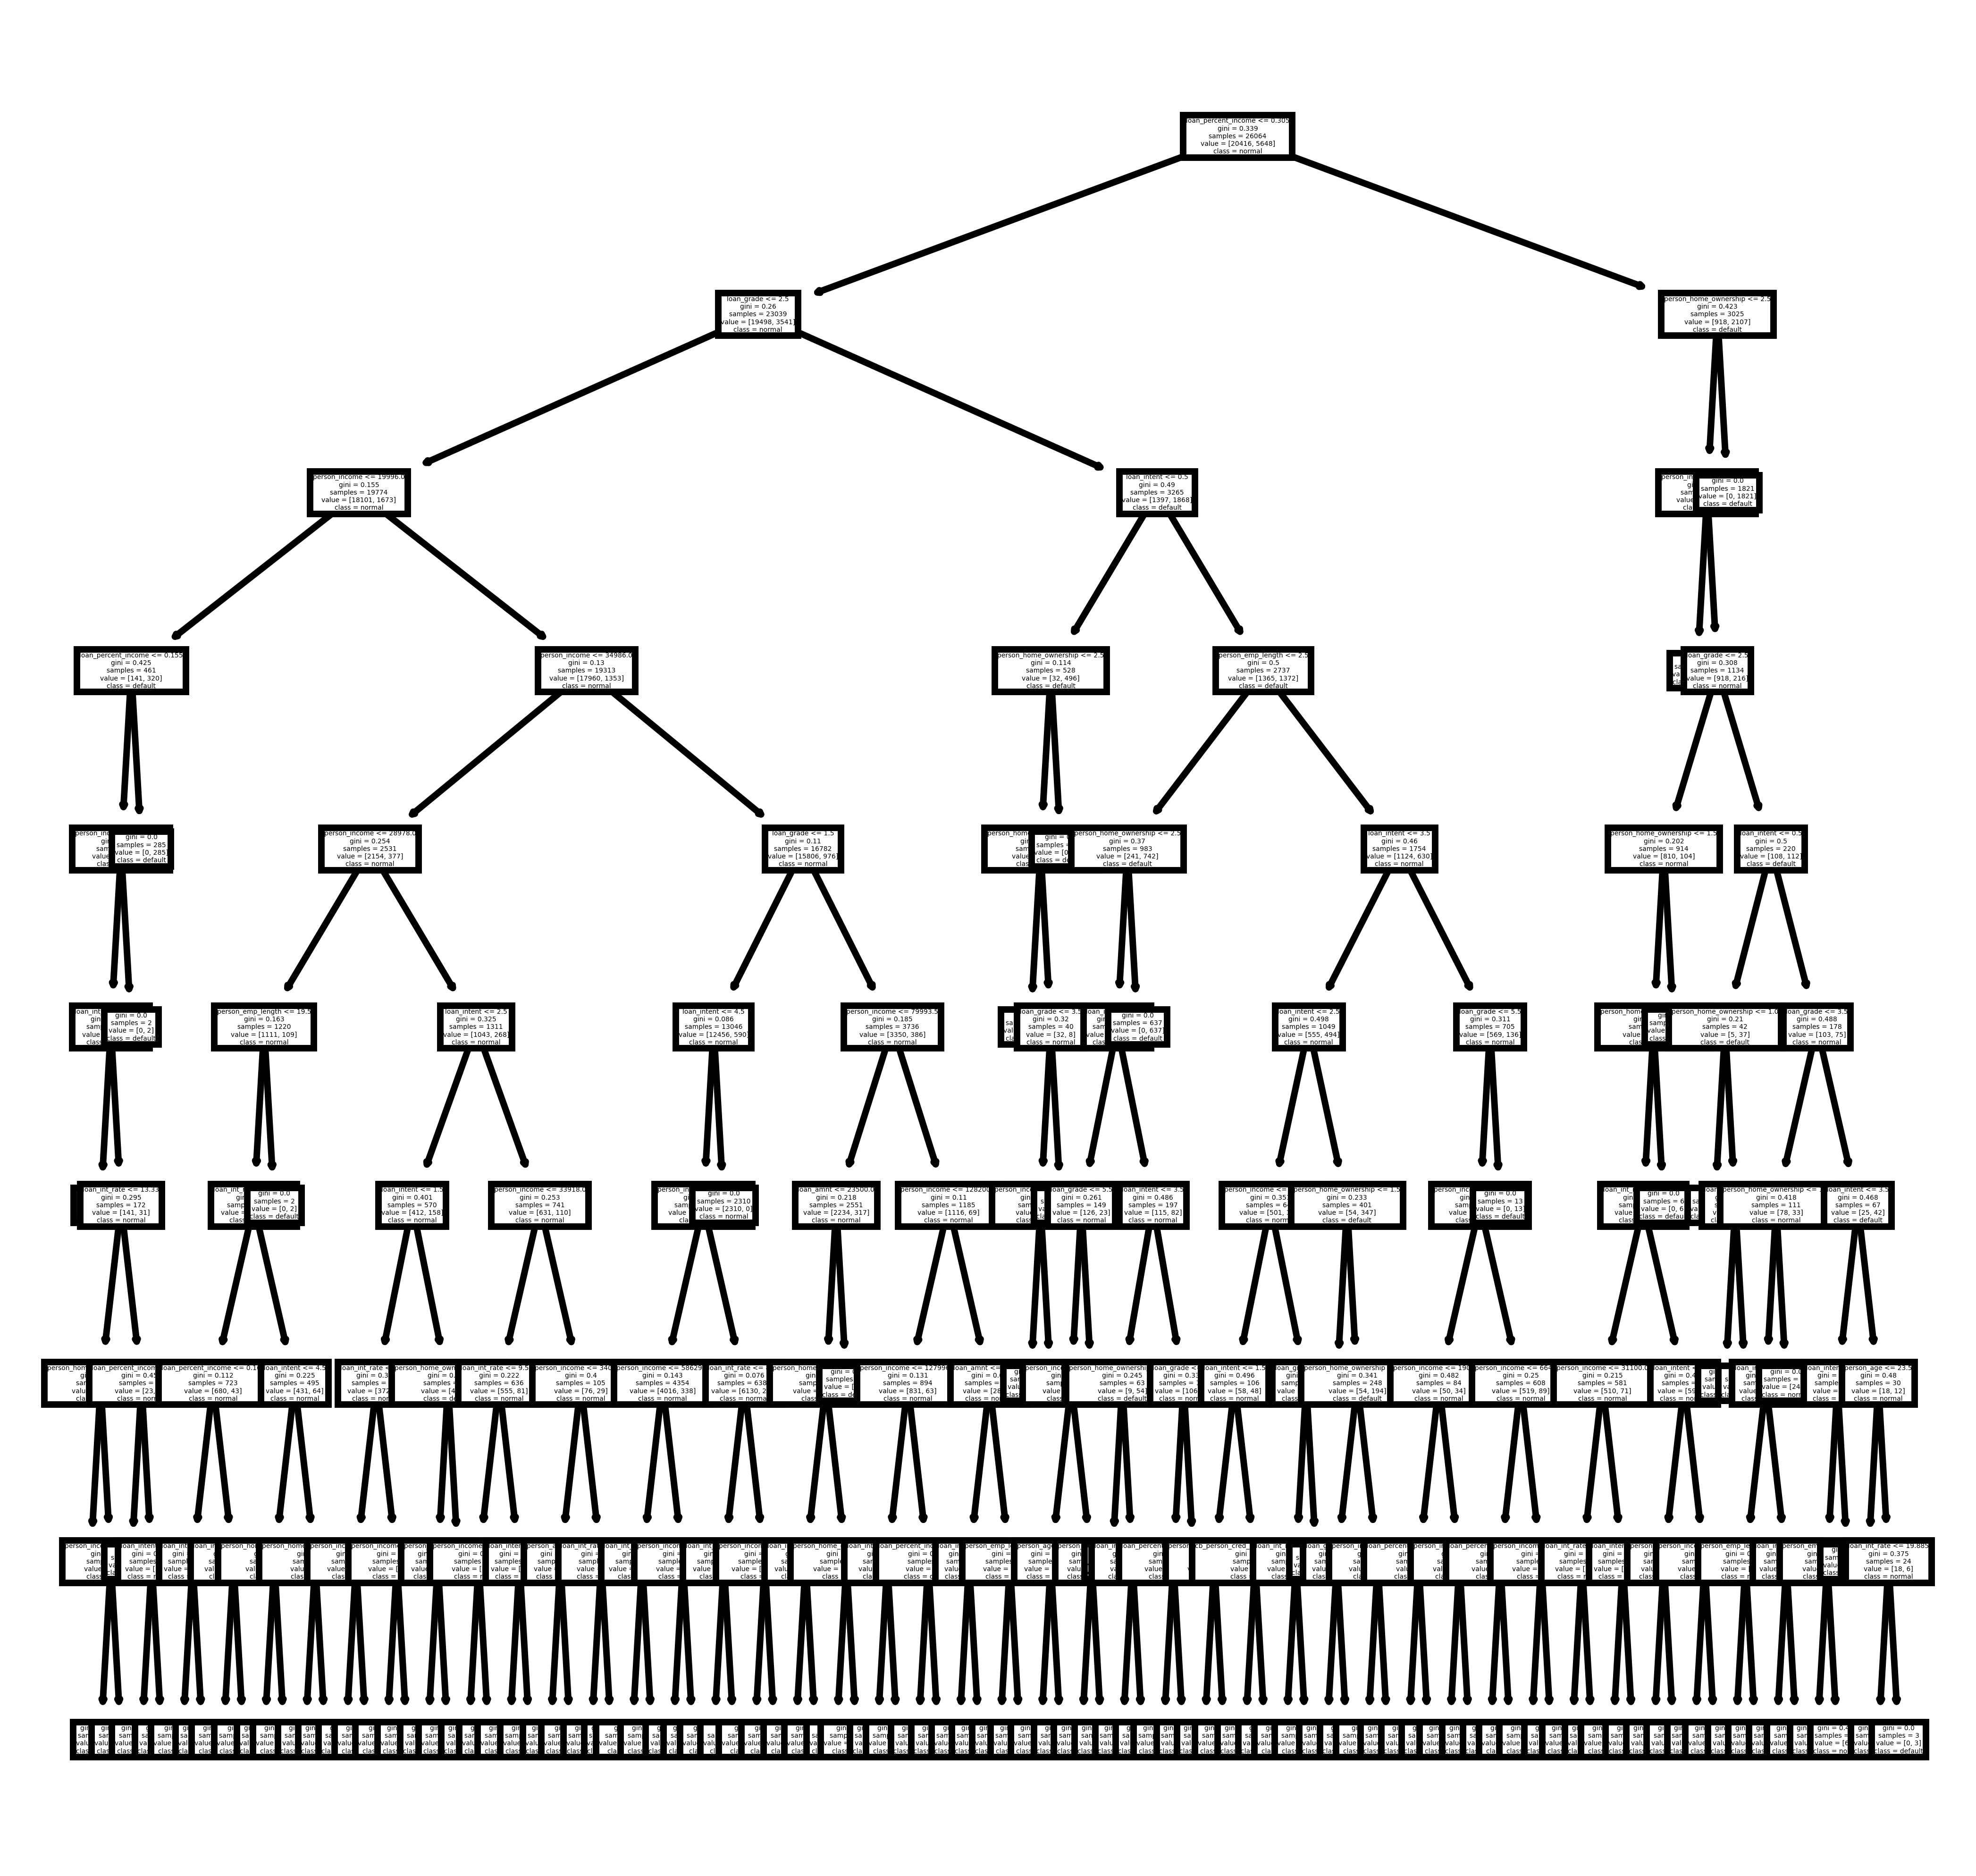

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=1000)
tree.plot_tree(dt_clf, feature_names=X_train.columns, class_names=['normal','default'])

Check the importances of features

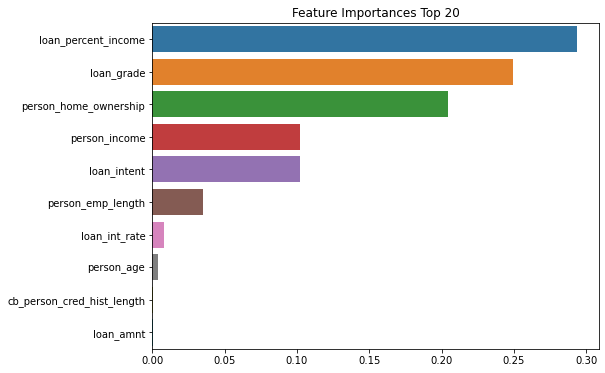

In [14]:
ftr_importances_values=dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

3. RandomForest Test

In [15]:
for depth in max_depths:
    rf_clf=RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=rnd_st)
    rf_clf.fit(X_train, y_train)
    rf_pred=rf_clf.predict(X_test)
    print('RandomForestClassifier max_depth: {0} Accuracy Score: {1:.4f}'.format(depth, accuracy_score(y_test, rf_pred)))
print('\n')

RandomForestClassifier max_depth: 3 Accuracy Score: 0.8961
RandomForestClassifier max_depth: 5 Accuracy Score: 0.9178
RandomForestClassifier max_depth: 7 Accuracy Score: 0.9207
RandomForestClassifier max_depth: 9 Accuracy Score: 0.9277
RandomForestClassifier max_depth: 11 Accuracy Score: 0.9309




4. LogisticRegression Test

In [16]:
lr_clf=LogisticRegression(random_state=rnd_st)
lr_clf.fit(X_train, y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression Accuracy Score: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('\n')

LogisticRegression Accuracy Score: 0.8034




5 KNeighbors Test

In [17]:
knn_clf=KNeighborsClassifier(n_neighbors=8)
knn_clf.fit(X_train, y_train)
knn_pred=knn_clf.predict(X_test)
print('KNeighborsClassifier Accuracy Score: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('\n')

KNeighborsClassifier Accuracy Score: 0.8392




6. Ensenble Learning (VotingClassifier Test)

In [18]:
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')
vo_clf.fit(X_train, y_train)
vo_pred=vo_clf.predict(X_test)
print('VotingClassifier Accuracy Score: {0:.4f}'.format(accuracy_score(y_test, vo_pred)))
print('\n')

VotingClassifier Accuracy Score: 0.8430




7. Ensenble Learning (GradientBoostingClassifier Test)

In [19]:
gb_clf=GradientBoostingClassifier(random_state=rnd_st)
gb_clf.fit(X_train, y_train)
gb_pred=gb_clf.predict(X_test)
print('GradientBoostingClassifier Accuracy Score: {0:.4f}'.format(accuracy_score(y_test, gb_pred)))
print('\n')

GradientBoostingClassifier Accuracy Score: 0.9245




8. Ensenble Learning (AdaBoostClassifier Test)

In [20]:
ada_clf=AdaBoostClassifier(n_estimators=400)
ada_clf.fit(X_train, y_train)
ada_pred=ada_clf.predict(X_test)
print('AdaBoostClassifier Accuracy Score: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))
print('\n')

AdaBoostClassifier Accuracy Score: 0.8930




9. XGBoost Test

In [21]:
xgb_clf=XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, random_state=rnd_st)
xgb_clf.fit(X_train, y_train)
xgb_pred=xgb_clf.predict(X_test)
print('XGBoost Classifier Accuracy Score: {0:.4f}'.format(accuracy_score(y_test, xgb_pred)))
print('\n')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:59:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier Accuracy Score: 0.9322


